<a href="https://colab.research.google.com/github/TonioHathos/AI_Valeo/blob/main/%20Code_Cl%C3%A9ment/trees-and-ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

from collections import Counter

from imblearn.over_sampling import SMOTE


# Import the visualization library I prepared for you
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from visualization import plot_conf_mat, plot_feature_importances


!pip install ipython-autotime # To show time at each cell
                              # Credits to https://medium.com/@arptoth/how-to-measure-execution-time-in-google-colab-707cc9aad1c8
%load_ext autotime


# The following is to be able to mount Google Drive
from google.colab import drive

import pickle # To save the model
from os.path import isfile

--2023-05-31 10:20:32--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py.4’

visualization.py.4  100%[===================>]  12.72K  --.-KB/s    in 0s      

2023-05-31 10:20:32 (36.1 MB/s) - ‘visualization.py.4’ saved [13023/13023]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 6.84 s (started: 2023-05-31 10:20:32 +00:00)


Mount Google Drive

In [80]:
mount_point = '/content/gdrive' # Always the same, don't change it
drive.mount(mount_point, force_remount=True)
drive_path = mount_point + '/My Drive/' # Always the same, don't change it
my_path = drive_path + \
  'TSP/Apprentissage_automatique_réseau/'

Mounted at /content/gdrive
time: 3.39 s (started: 2023-05-31 10:20:39 +00:00)


In [81]:
! rm -f *.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/df_training_mod.csv
df = pd.read_csv('df_training_mod.csv')

--2023-05-31 10:20:42--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/df_training_mod.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2666373 (2.5M) [text/plain]
Saving to: ‘df_training_mod.csv’

df_training_mod.csv 100%[===================>]   2.54M  --.-KB/s    in 0.07s   

2023-05-31 10:20:43 (37.8 MB/s) - ‘df_training_mod.csv’ saved [2666373/2666373]

time: 965 ms (started: 2023-05-31 10:20:42 +00:00)


# Load dataset and preliminary operations


In [82]:
df = df.drop(columns=['Unnamed: 0'])

time: 4.13 ms (started: 2023-05-31 10:20:43 +00:00)


In [83]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=10)

time: 8.9 ms (started: 2023-05-31 10:20:43 +00:00)


In [84]:
y_train = df_train['Binar OP130_Resultat_Global_v'].copy()
y_test = df_test['Binar OP130_Resultat_Global_v'].copy()
X_train = df_train.drop(columns=['Binar OP130_Resultat_Global_v'])
X_test = df_test.drop(columns=['Binar OP130_Resultat_Global_v'])
     

y_train

17097    0
18011    0
32135    0
21213    0
12074    0
        ..
10201    0
9372     0
28017    0
29199    0
17673    0
Name: Binar OP130_Resultat_Global_v, Length: 25886, dtype: int64

time: 18.6 ms (started: 2023-05-31 10:20:43 +00:00)


Let's partition the dataset in training and test dataset

Check for class imbalance and correct for it

In [85]:
print( "Samples per class before SMOTE: ", Counter(y_train) )

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

print( "Samples per class after SMOTE: ", Counter(y_train) )

Samples per class before SMOTE:  Counter({0: 25663, 1: 223})
Samples per class after SMOTE:  Counter({0: 25663, 1: 25663})
time: 93 ms (started: 2023-05-31 10:20:43 +00:00)


### Scaling

# Training and testing a random forest

In [86]:
model = RandomForestClassifier(n_estimators=100, 
                      criterion='gini', 
                      max_leaf_nodes=16, # Each tree cannot have more than that
                      random_state=5, # For reproducibility
                      n_jobs=-1, # Use all the CPUs
                      max_features = 'auto' # auto means=sqrt(n_features)
                      )

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', max_leaf_nodes=16, n_jobs=-1,
                       random_state=5)

time: 11.8 s (started: 2023-05-31 10:20:43 +00:00)


Normalized confusion matrix
[[0.84930385 0.15069615]
 [0.53658537 0.46341463]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

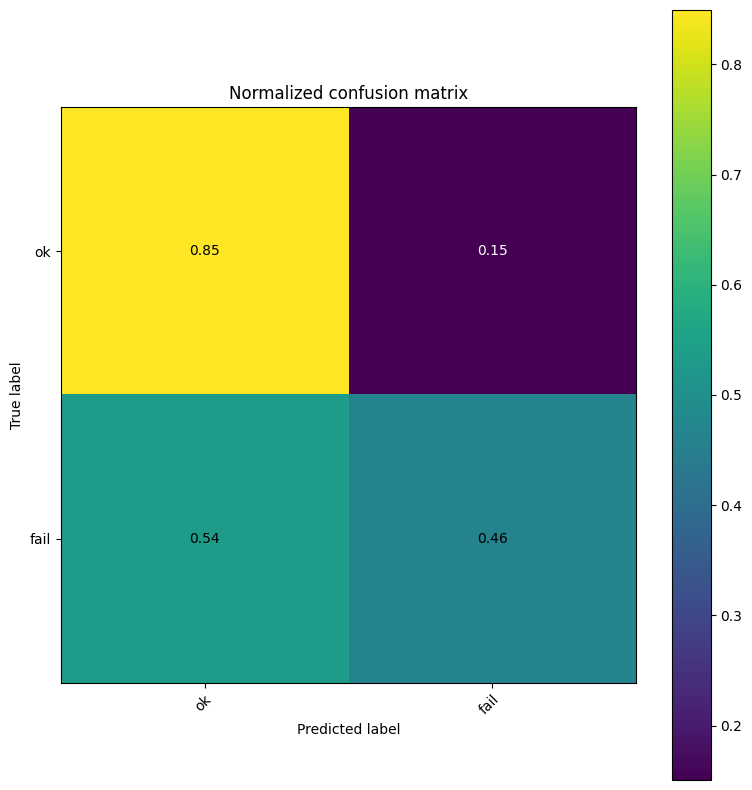

time: 1.22 s (started: 2023-05-31 10:20:55 +00:00)


In [87]:
y_pred = model.predict(X_test)

class_names = np.array(['ok', 'fail'])
plot_conf_mat(y_test, y_pred, class_names)

Let's check the feature importance

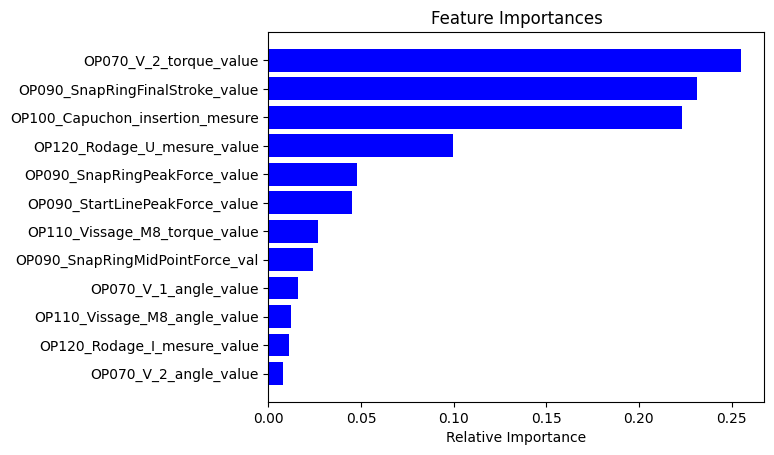

Index(['OP070_V_1_angle_value', 'OP090_SnapRingPeakForce_value',
       'OP070_V_2_angle_value', 'OP120_Rodage_I_mesure_value',
       'OP090_SnapRingFinalStroke_value', 'OP110_Vissage_M8_torque_value',
       'OP100_Capuchon_insertion_mesure', 'OP120_Rodage_U_mesure_value',
       'OP090_StartLinePeakForce_value', 'OP110_Vissage_M8_angle_value',
       'OP090_SnapRingMidPointForce_val', 'OP070_V_2_torque_value'],
      dtype='object')

time: 689 ms (started: 2023-05-31 10:20:56 +00:00)


In [88]:
feature_names = X_test.columns
plot_feature_importances(model.feature_importances_, feature_names)
feature_names

Memory and Disk are the most determining factors in producing a failure

# Hyperparameter tuning
You have three possibility:
* Manual tuning: 
  * Divide the training set in training subset and validation subset
  * Train different classifiers (with different hyperparameters) on the training subset
  * Check their performance, i.e., accuracy, on the validation subset
  * Choose the best
  * Test it on the test set
* `GridSearchCV` (as in `02.regression/b.polynomial-regression.ipynb`)
* `RandomizedSearchCV`

We use the latter now. See [Open Data Science post](https://medium.com/@ODSC/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead).

Let's first define the values of the parameters we want to explore

In [89]:
 param_grid = {
    'criterion':['gini', 'entropy'],
    'max_features':'auto',

    # Number of allowed leafs
    'max_leaf_nodes':[16, 32, 64, 128, 256, 512, 1024, 2048],

    # A node will be split if this split induces a decrease of the 
    # impurity greater than or equal to this value.
    'min_impurity_decrease' : [0, 0.001, 0.01, 0.1, 0.2],
            
    'max_depth':[1,10,100,1000,10000,100000],

    # A node can be a leaf only if it contains at least the following fraction
    # of samples
    'min_weight_fraction_leaf' : [0.1, 0.01, 0.001, 0]
    
}

time: 918 µs (started: 2023-05-31 10:20:57 +00:00)


We have a lot of possible configurations to check. We specify to just test 50
out of them.


In [90]:
# Before we had used all the availble CPUs for training one random forest.
# Now, instead, we use one CPU per random forest (n_jobs=1). 
forest = RandomForestClassifier(n_estimators=100, random_state = 4, n_jobs=1,)


search = RandomizedSearchCV(
                            scoring = 'accuracy', # See other possible metrics in
                                                # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                            
                            estimator=forest, 
                            param_distributions=param_grid,
                            n_iter=50, # We just test 50 configurations
                            verbose=2,random_state=42, 
                            n_jobs=-1, # Triain forests in parallel using 
                                      # all CPUs
                            cv=5 # 5-fold validation                      
                          )
# Note that we are training different random forests in parallel (n_jobs=-1),
# each with a certain combination of hyper-parameters.

search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=1, random_state=4),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 10, 100, 1000, 10000,
                                                      100000],
                                        'max_features': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [16, 32, 64, 128, 256,
                                                           512, 1024, 2048],
                                        'min_impurity_decrease': [0, 0.001,
                                                                  0.01, 0.1,
                                                                  0.2],
                                        'min_weight_fraction_leaf': [0.1, 0.01,
                                                                     0.001,
                                                                     0]},
                   random_state=42, scoring='accuracy', verbose=2)

time: 13min 36s (started: 2023-05-31 10:20:57 +00:00)


In [91]:
print(search.best_params_)

model = search.best_estimator_


{'min_weight_fraction_leaf': 0, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 64, 'max_features': 3, 'max_depth': 100000, 'criterion': 'entropy'}
time: 1.57 ms (started: 2023-05-31 10:34:34 +00:00)


Now that we have the model with the best hyperparameters, we train it on the entire dataset

Normalized confusion matrix
[[0.90534691 0.09465309]
 [0.59756098 0.40243902]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

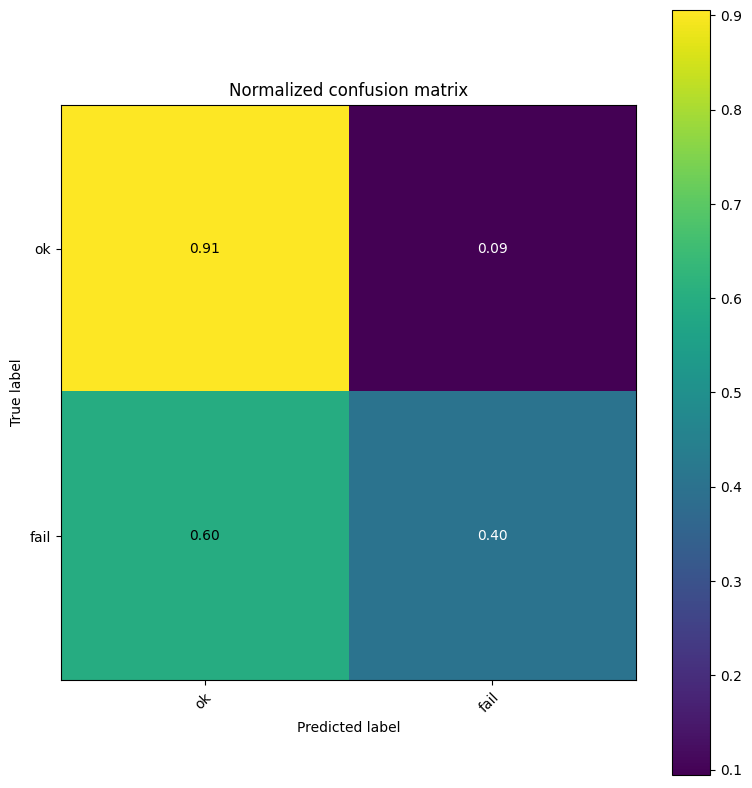

time: 13.8 s (started: 2023-05-31 10:34:34 +00:00)


In [92]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_conf_mat(y_test, y_pred, class_names)

Note that we get also get probabilities with RandomForests (fraction of trees 

*   Élément de liste
*   Élément de liste

that predicted `1`). And thus, we can compute cross-entropy

In [93]:
proba = model.predict_proba(X_test)
print("Output probabilities are ",proba)


print("Cross entropy = ", log_loss(y_test, proba))

Output probabilities are  [[0.88495974 0.11504026]
 [0.90498227 0.09501773]
 [0.53440928 0.46559072]
 ...
 [0.87150866 0.12849134]
 [0.42620934 0.57379066]
 [0.89277895 0.10722105]]
Cross entropy =  0.26909549584921905
time: 152 ms (started: 2023-05-31 10:34:47 +00:00)


Don't confuse cross-entropy with entropy of a tree node!

Since it may take some time to perform randomized search, let's save the model (**serializing** the python object)

In [94]:
filename = my_path+'forest-1.pkl'
pickle.dump(model, open(filename, 'wb'))

time: 56.7 ms (started: 2023-05-31 10:34:48 +00:00)


To later retrieve it:



In [95]:
model = pickle.load(open(filename, 'rb'))

time: 13.4 ms (started: 2023-05-31 10:34:48 +00:00)


It is convenient to automate this process

In [96]:
def search_or_load(model_filename, search, X_train, y_train):
  if(isfile(model_filename) ):
    print("Loading model")
    model = pickle.load(open(model_filename, 'rb'))

  else:
    print("Searching the best hyper_parameters")
    search.fit(X_train, y_train)
    print(search.best_params_)
    model = search.best_estimator_
    print("Training model")
    model.fit(X_train,y_train)
    pickle.dump(model, open(model_filename, 'wb'))
    print("Model saved in in file ", model_filename)
  return model


time: 953 µs (started: 2023-05-31 10:34:48 +00:00)


If we call this function, it will not redo the search, as the model has already been saved

In [97]:
model = search_or_load(filename, search, X_train, y_train)

Loading model
time: 21.5 ms (started: 2023-05-31 10:34:48 +00:00)


### More iterations


Let's try to increase the number of tested configurations


In [98]:
search = RandomizedSearchCV(
                            scoring = 'accuracy', # See other possible metrics in
                                                # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                            
                            estimator=forest, 
                            param_distributions=param_grid,
                            n_iter=200,
                            verbose=2,random_state=42, 
                            n_jobs=-1, # Triain forests in parallel using 
                                      # all CPUs
                            cv=5 # 5-fold validation                      
                          )



time: 649 µs (started: 2023-05-31 10:34:48 +00:00)


In [99]:
filename = my_path + 'forest-2.pkl'
model = search_or_load(filename, search, X_train, y_train)

Loading model
time: 83.9 ms (started: 2023-05-31 10:34:48 +00:00)


Normalized confusion matrix
[[0.998011   0.001989  ]
 [0.97560976 0.02439024]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

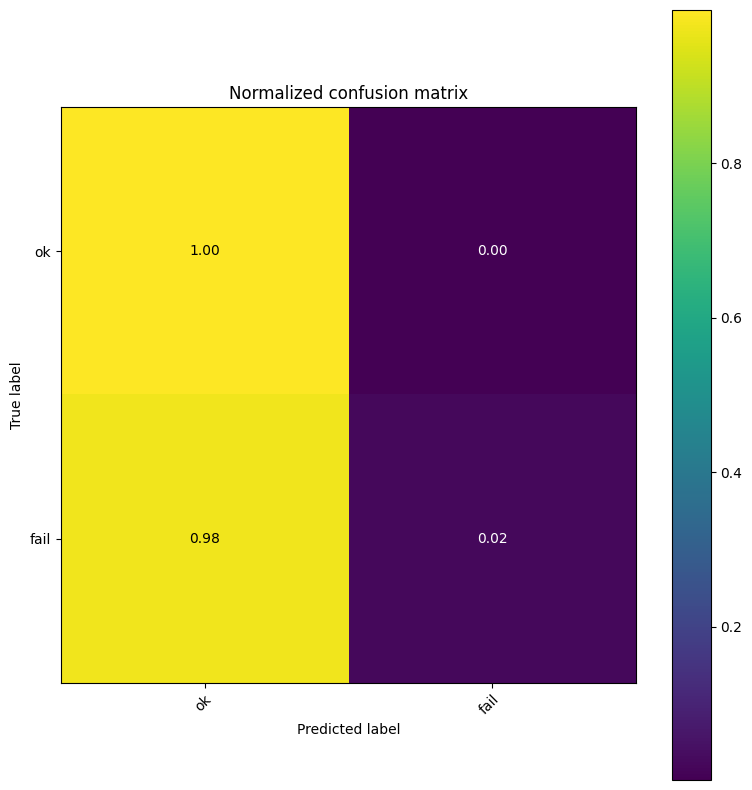

time: 757 ms (started: 2023-05-31 10:34:48 +00:00)


In [100]:

y_pred = model.predict(X_test)

plot_conf_mat(y_test, y_pred, class_names)

It's better

Ways to improve eve further:
* Increase the number of trees
* Increase the number of configurations to try out

## Isolation Forest

In [ ]:
model = IsolationForest(n_estimators=500)
model.fit(X_train)

In [ ]:
anomaly_scores = 0.5 - model.decision_function(X_train)
evaluate_anomaly_detector(y_train, anomaly_scores)